In [1]:
import numpy as np
%matplotlib inline
import cv2 as cv
from matplotlib import pyplot as plt

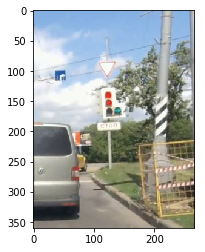

In [5]:
img = cv.imread('vis1.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [6]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [37]:
array = gray.flatten()

# hist = sorted(array)
num_pix = len(array)

In [38]:
hist = cv.calcHist([gray],[0],None,[256],[0,256])

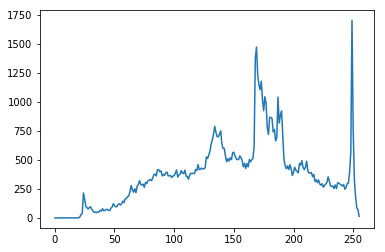

In [39]:
plt.plot(hist)

In [40]:
hist.shape

(256, 1)

In [68]:
histo,bins = np.histogram(gray.flatten(),256,[0,256])

In [69]:
quantile = 0.05
req_sum = int(num_pix * 0.05)
summ = 0
index = -1
for i,v in enumerate(histo):
    summ+=v
    if summ > req_sum:
        index = i
        break
index_start = index

In [70]:
quantile = 0.05
req_sum = int(num_pix * 0.05)
summ = 0
index = -1
for i,v in enumerate(reversed(histo)):
    summ+=v
    if summ > req_sum:
        index = i
        break
index_end = len(histo) - index

In [77]:
print(index_start,index_end)

66 245


In [124]:
def relu(x):
    if x < index_start:
        return 0
    if x >= index_end:
        return 255
    return (x - index_end) * 255 / (index_end - index_start) + 255

In [136]:
lookup_table = np.zeros(256, dtype=np.uint8)
for i in range(256):
    lookup_table[i] = int(relu(i))

In [137]:
lookup_table

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   2,   4,   5,   7,   8,   9,  11,  12,  14,  15,
        17,  18,  19,  21,  22,  24,  25,  27,  28,  29,  31,  32,  34,
        35,  37,  38,  39,  41,  42,  44,  45,  47,  48,  49,  51,  52,
        54,  55,  56,  58,  59,  61,  62,  64,  65,  66,  68,  69,  71,
        72,  74,  75,  76,  78,  79,  81,  82,  84,  85,  86,  88,  89,
        91,  92,  94,  95,  96,  98,  99, 101, 102, 103, 105, 106, 108,
       109, 111, 112, 113, 115, 116, 118, 119, 121, 122, 123, 125, 126,
       128, 129, 131, 132, 133, 135, 136, 138, 139, 141, 142, 143, 145,
       146, 148, 149, 151, 152, 153, 155, 156, 158, 159, 160, 16

In [174]:
%time
copslow = gray.copy()
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        copslow[i,j] = relu(gray[i,j])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [175]:
%time
cop = gray.copy()
cop = cv.LUT(cop, lookup_table) 

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


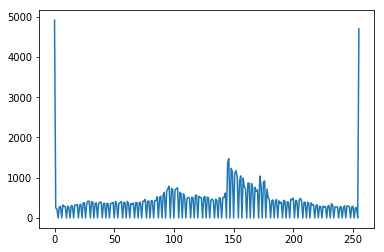

In [176]:
hist = cv.calcHist([copslow],[0],None,[256],[0,256])
plt.plot(hist)

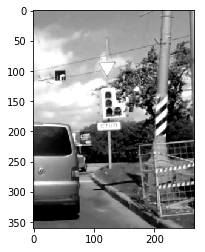

In [177]:
plt.imshow(copslow, cmap='gray')

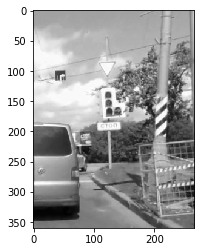

In [171]:
plt.imshow(gray,cmap='gray')

In [1]:
print(3)

3
